# GARCH

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.tsa.stattools import acf

In [16]:
sp500prices = pd.read_csv("data/data_other/sp500prCl.csv", sep=";")
sp500prices['Data'] = pd.to_datetime(sp500prices['Data'], format='%Y-%m-%d')
sp500prices.set_index('Data', inplace=True)

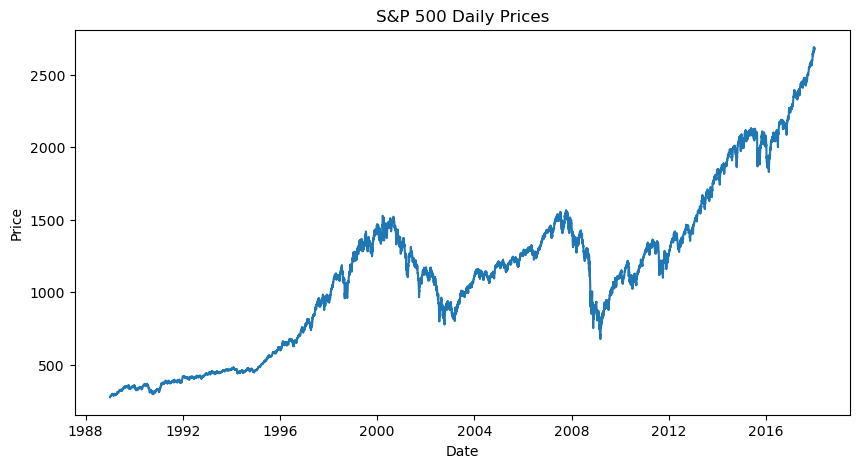

In [17]:
plt.figure(figsize=(10,5))
plt.plot(sp500prices['Price'])
plt.title("S&P 500 Daily Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [18]:
sp500ret = np.log(sp500prices['Price']).diff().dropna()
daily_std = sp500ret.std()
print("Daily Standard Deviation:", daily_std)

annual_volatility = np.sqrt(252) * daily_std
print("Annualized Volatility:", annual_volatility)

Daily Standard Deviation: 0.011003508200850708
Annualized Volatility: 0.1746752774922644


In [19]:
vol_2009 = np.sqrt(252) * sp500ret.loc['2009'].std()
vol_2017 = np.sqrt(252) * sp500ret.loc['2017'].std()
print("Annualized Volatility (2009):", vol_2009)
print("Annualized Volatility (2017):", vol_2017)

Annualized Volatility (2009): 0.2726419295650889
Annualized Volatility (2017): 0.06687345194338136


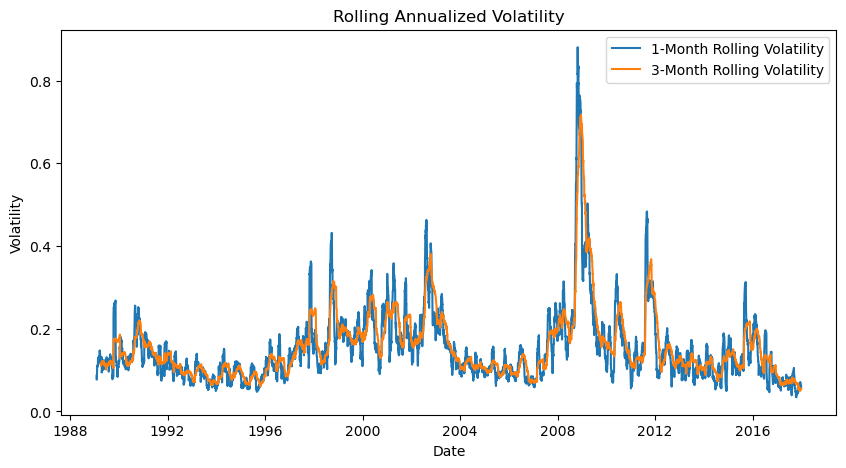

In [20]:
rolling_vol_1m = sp500ret.rolling(window=22).std() * np.sqrt(252)
rolling_vol_3m = sp500ret.rolling(window=66).std() * np.sqrt(252)

plt.figure(figsize=(10,5))
plt.plot(rolling_vol_1m, label="1-Month Rolling Volatility")
plt.plot(rolling_vol_3m, label="3-Month Rolling Volatility")
plt.legend()
plt.title("Rolling Annualized Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()


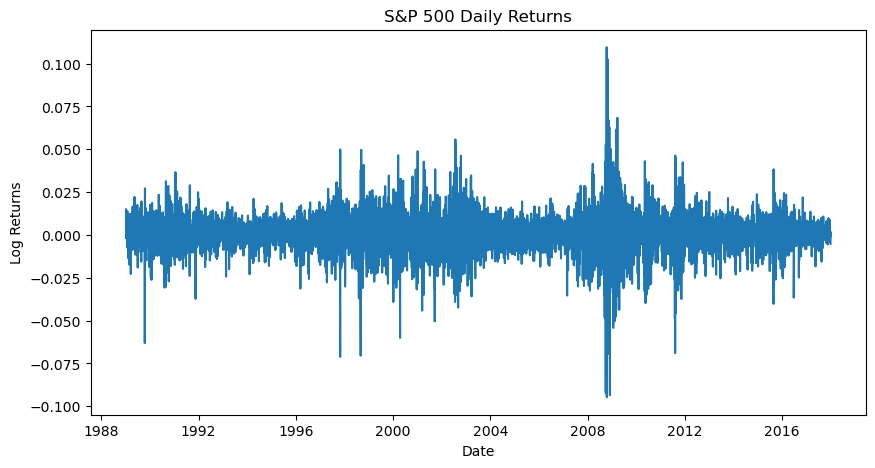

In [21]:
plt.figure(figsize=(10,5))
plt.plot(sp500ret)
plt.title("S&P 500 Daily Returns")
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.show()

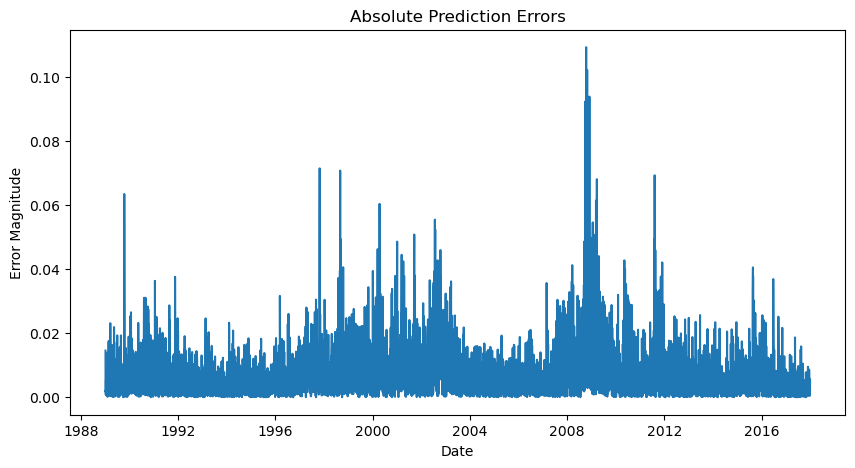

In [22]:
mean_return = sp500ret.mean()
prediction_errors = sp500ret - mean_return

plt.figure(figsize=(10,5))
plt.plot(abs(prediction_errors))
plt.title("Absolute Prediction Errors")
plt.xlabel("Date")
plt.ylabel("Error Magnitude")
plt.show()

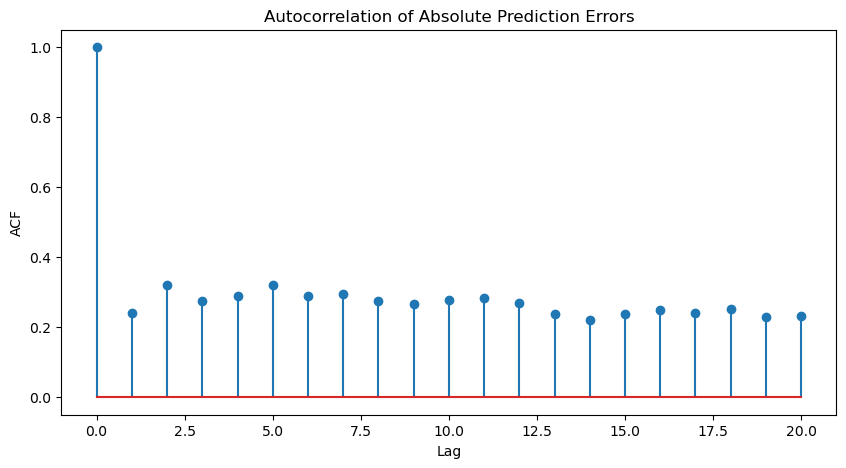

In [24]:
acf_values = acf(abs(prediction_errors), nlags=20)
plt.figure(figsize=(10,5))
plt.stem(acf_values)
plt.title("Autocorrelation of Absolute Prediction Errors")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

Fitting a GARCH(1,1) model to the data.

In [7]:
garch_model = arch_model(sp500ret * 100, vol='Garch', p=1, q=1)
results = garch_model.fit()
print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 27985410174.344517
Iteration:      2,   Func. Count:     15,   Neg. LLF: 886709025.4276028
Iteration:      3,   Func. Count:     23,   Neg. LLF: 9661.95974410994
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1955593727.9493499
Iteration:      5,   Func. Count:     35,   Neg. LLF: 11440.858633472606
Iteration:      6,   Func. Count:     42,   Neg. LLF: 9608.213829093425
Iteration:      7,   Func. Count:     48,   Neg. LLF: 9621.585790943607
Iteration:      8,   Func. Count:     54,   Neg. LLF: 9584.757698053141
Iteration:      9,   Func. Count:     60,   Neg. LLF: 9583.543428936004
Iteration:     10,   Func. Count:     65,   Neg. LLF: 9583.535592623975
Iteration:     11,   Func. Count:     70,   Neg. LLF: 9583.53545326033
Iteration:     12,   Func. Count:     75,   Neg. LLF: 9583.535423602912
Iteration:     13,   Func. Count:     79,   Neg. LLF: 9583.535423603662
Optimization terminated successfully    (Exit mode 0)
         